# **1. Giới thiệu về mạng neural nhân tạo**

Mạng nơ-ron nhân tạo (Neural Network - NN) là một mô hình lập trình rất đẹp lấy cảm hứng từ các tế bào thần kinh sinh học. Chúng rất linh hoạt, mạnh mẽ và có thể mở rộng, khiến chúng trở nên lý tưởng để giải quyết các tác vụ Machine Learning lớn và rất phức tạp, chẳng hạn như phân loại hàng tỷ hình ảnh (ví dụ: Google Images), cung cấp năng lượng cho các dịch vụ nhận dạng giọng nói (ví dụ: Siri của Apple), đề xuất các video hay nhất để xem cho hàng trăm triệu người dùng mỗi ngày (ví dụ: YouTube) hoặc học cách đánh bại nhà vô địch thế giới trong trò chơi cờ vây bằng cách kiểm tra hàng triệu trò chơi trong quá khứ và sau đó chơi với chính nó (AlphaGo của DeepMind).

# **2. Các loại mạng neural nhân tạo**

Mạng thần kinh nhân tạo có thể được phân chia thành nhiều loại khác nhau, sử dụng cho những mục đích khác nhau.

## **a) Mạng Perceptron**

Perceptron là một trong những kiến trúc ANN đơn giản nhất, được phát minh vào năm 1957 bởi Frank Rosenblatt. Nó dựa trên một mạng neural được gọi là đơn vị ngưỡng tuyến tính (LTU): đầu vào và đầu ra là các số, các đầu vào được điều phối tầm ảnh hưởng bởi các trọng số tương ứng. LTU sẽ tính tổng trọng số của các đầu vào \$z = w\_{1}x\_{1} + w\_{2}x\_{2} + ... + w\_{n}x\_{n} = x\^{T}w\$, sau đó áp dụng hàm step cho tổng đó và xuất ra kết quả \$h\_{w}(x) = step(z)\$

![Threshold logic unit](image/mlst_1004.png)

Hàm step phổ biến nhất được dùng trong Perceptron là hàm Heaviside. Đôi khi, hàm xác định dấu được sử dụng để thay thế.
$$
heaviside(z) = \left\{\begin{matrix}
0 & if & z < 0\\ 
1 & if & z \geq 0 & 
\end{matrix}\right.
sgn(z) = \left\{\begin{matrix}
-1 & if & z<0 \\ 
 0& if &z=0 \\ 
 1& if &z>0 
\end{matrix}\right.
$$

Một LTU duy nhất có thể được sử dụng để phân loại nhị phân tuyến tính đơn giản. Perceptron chỉ đơn giản bao gồm một lớp TLU duy nhất với mỗi tế bào thần kinh được kết nối với tất cả các đầu vào. 

Thuật toán đào tạo Perceptron được lấy cảm hứng từ quy tắc Hebb: trọng số kết nối giữa hai tế bào thần kinh được tăng lên bất kì khi nào chúng có cùng đầu ra. Perceptron được đào tạo bằng cách sử dụng một biến thể của quy tắc này có tính đến lỗi do mạng gây ra; Nó củng cố các kết nối giúp giảm sai số. Cụ thể hơn, Perceptron được cung cấp một trường hợp đào tạo tại một thời điểm và đối với mỗi trường hợp, nó đưa ra dự đoán của nó. Đối với mỗi tế bào thần kinh cho ra một dự đoán sai, nó củng cố trọng số kết nối từ các đầu vào sẽ góp phần vào dự đoán chính xác. Quy luật đó được thể hiện qua phương trình sau:
$$
w_{i, j}^{(next step)}=w_{i,j}+\eta (y_{j}-\widehat{y_{j}})x_{i}
$$

Ranh giới quyết định đầu ra của mỗi neural là tuyến tính, vì vậy Perceptron không có khả năng học các mẫu phức tạp (ví dụ như vấn đề phân loại $XOR$). Tuy nhiên, ta có thể loại bỏ hạn chế đó bằng cách xếp chồng nhiều Perceptron tạo thành Multi-Layer Perceptron có thể giải quyết được nhiều vấn đề phức tạp hơn.

![XOR classification problem and an MLP that solves it](image/mlst_1006.png)

Scikit-Learn cung cấp một lớp Perceptron thực hiện một TLU duy nhất. Ví dụ, trên tập dữ liệu Iris

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)


C:\Users\imlda\AppData\Local\Temp\ipykernel_4896\1800480898.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)  # Iris Setosa?


Perceptron()

In [2]:
per_clf.predict([[2, 0.5]])


array([0])

## **b) Mạng neural truyền thẳng nhiều lớp (MLP) và thuật toán lan truyền ngược (Backpropagation)**

MLP bao gồm một lớp đầu vào, một hoặc nhiều lớp LTU (lớp ẩn) và lớp LTU cuối cùng được gọi là lớp đầu ra. Khi một ANN có hai hoặc nhiều lớp ẩn thì nó được gọi là Deep neural networks.

![Multi-Layer Perceptron](image/mlst_1007.png)

Các nhà nghiên cứu đã cố gắng tìm các để đào tạo MLP trong nhiều năm nhưng không thành công. Nhưng vào năm 1986 David Rumelhart, Geoffrey Hinton và Ronald William đã giới thiệu về thuật toán lan truyền ngược. Thuật toán này được sử dụng để tối ưu hàm mất mát bằng cách điều chỉnh các trọng số của mạng neural. Quá trình huấn luyện bằng backpropagation bao gồm hai giai đoạn: forward pass và backward pass. Forward pass tính toán đầu ra của mạng neural cho một mẫu dữ liệu đầu vào. Sau đó, backward pass tính toán đạo hàm của hàm mất mát theo từng trọng số trong mạng neural. Thuật toán Gradient Descent được sử dụng để điều chỉnh các trọng số dựa trên đạo hàm tính được.

## **c) Regression MLPs**

Mạng MLP có thể được sử dụng cho các tác vụ hồi quy. Nếu bạn muốn dự đoán một giá trị duy nhất (ví dụ: giá nhà dựa trên nhiều đặc trưng của nó), thì bạn chỉ cần một neuron đầu ra: đầu ra của nó là giá trị dự đoán. Đối với hồi quy đa biến (tức là để dự đoán nhiều giá trị cùng một lúc), bạn cần một neuron đầu ra cho mỗi chiều đầu ra. Ví dụ: để xác định tâm của một đối tượng trên một hình ảnh, bạn cần dự đoán tọa độ 2D, vì vậy bạn cần hai neuron đầu ra. Nếu bạn muốn đặt một hộp bao quanh đối tượng, bạn cần thêm hai số nữa: chiều rộng và chiều cao của đối tượng. Vì vậy, bạn sẽ có tổng cộng 4 neuron đầu ra.

Hàm kích hoạt được sử dụng trong đầu ra có thể không có hoặc sử dụng ReLU hoặc softplus để đảm bảo giá trị đầu ra luôn là dương, hoặc sử dụng logistic hoặc tanh để đảm bảo giá trị đầu ra nằm trong phạm vi giá trị cần thiết.

Hàm mất mát thường được sử dụng là sai số trung bình bình phương, hoặc có thể sử dụng sai số trung bình tuyệt đối hoặc Huber loss.

## **d) Classification MLPs**

Mạng MLP cũng có thể được sử dụng cho các tác vụ phân loại. Đối với một bài toán phân loại nhị phân, ta chỉ cần sử dụng một neuron đầu ra với hàm kích hoạt logistic: đầu ra sẽ là một số từ 0 đến 1, mà ta có thể hiểu là xác suất ước tính của lớp dương. 

MLP cũng có thể xử lý tốt các bài toán phân loại nhị phân đa nhãn, trong đó mỗi mẫu có thể thuộc về nhiều lớp khác nhau. Ví dụ, hệ thống phân loại email có thể dự đoán liệu mỗi email đến có phải là thư thông thường hay thư rác, đồng thời dự đoán liệu nó có phải là email cấp bách hay không. Trong trường hợp này, ta cần hai neuron đầu ra, cả hai đều sử dụng hàm kích hoạt logistic: neuron đầu tiên sẽ đưa ra xác suất của email là thư rác và neuron thứ hai sẽ đưa ra xác suất của email là cấp bách. Nói chung, ta cần một neuron đầu ra cho mỗi lớp dương. 

Nếu mỗi mẫu chỉ thuộc về một lớp duy nhất trong số 3 hoặc nhiều hơn các lớp có thể có (ví dụ: các lớp từ 0 đến 9 cho phân loại hình ảnh số), ta cần có một neuron đầu ra cho mỗi lớp, và ta nên sử dụng hàm kích hoạt softmax cho toàn bộ lớp đầu ra. Hàm softmax sẽ đảm bảo rằng tất cả các xác suất ước tính đều nằm trong khoảng từ 0 đến 1 và tổng của chúng bằng 1 (điều này yêu cầu nếu các lớp là độc lập). Đây được gọi là phân loại đa lớp.

![A modern MLP (including ReLU and softmax) for classification](image/mlst_1008.jpg)

Về hàm mất mát, do chúng ta đang dự đoán phân phối xác suất nên hàm log loss nói chung sẽ là một lựa chọn tốt

# **3. Triển khai MLPs với Keras**

In [3]:
# import các thư viện cần thiết
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [5]:
X_train_full.shape


(60000, 28, 28)

In [6]:
X_train_full.dtype


dtype('uint8')

In [7]:
# chia tập huấn luyện ban đâu thành tập huấn luyện và tập kiểm tra
# chuẩn hoá đặc trưng
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]


'Coat'

In [9]:
def plot_items(data, labels):
    for i, image in enumerate(data):
        image_reshaped = image.reshape(28, 28)

        plt.subplot(2, 5, i+1)
        plt.imshow(image_reshaped, cmap="Blues")
        plt.title(class_names[labels[i]])
        plt.axis("off")


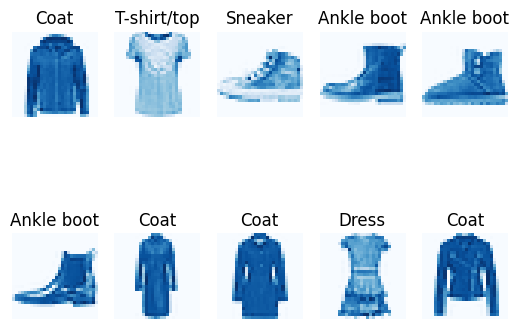

In [10]:
plot_items(X_train[:10], y_train[:10])
plt.show()


**Tạo model sử dụng Sequential API**

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


Đoạn code trên tạo ra một mô hình mạng nơ-ron sâu (deep neural network) với kiến trúc gồm 3 lớp fully connected layer. Mô hình này được tạo bằng cách sử dụng API Sequential của thư viện Keras.

Cụ thể, kiến trúc của mô hình gồm các lớp sau:

-   Lớp đầu tiên là một lớp Flatten, dùng để chuyển đổi đầu vào (các ma trận 2D của hình ảnh) thành một vector 1D. Lớp này không có trọng số và không thực hiện bất kỳ tính toán nào trên dữ liệu đầu vào.

-   Lớp thứ hai là một lớp Dense với 300 nơ-ron và hàm kích hoạt ReLU. Lớp này sử dụng ma trận trọng số để tính toán đầu ra từ đầu vào (vector 1D đã được chuyển đổi từ lớp đầu tiên). Đầu ra của lớp này cũng là một vector 1D với 300 phần tử.

-   Lớp thứ ba là một lớp Dense với 100 nơ-ron và hàm kích hoạt ReLU. Tương tự như lớp thứ hai, lớp này sử dụng ma trận trọng số để tính toán đầu ra từ đầu vào là vector 1D kết quả từ lớp trước đó. Đầu ra của lớp này cũng là một vector 1D với 100 phần tử.

-   Lớp cuối cùng là một lớp Dense với 10 nơ-ron và hàm kích hoạt softmax. Lớp này sử dụng ma trận trọng số để tính toán xác suất của mỗi lớp cho mỗi mẫu đầu vào. Đầu ra của lớp này là một vector 1D với 10 phần tử, tương ứng với xác suất của mỗi lớp.

In [12]:
model.summary()  # hiển thị tất cả các lớp của model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


**Compiling model**

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


- Hàm mất mát (loss function) được chọn là "sparse_categorical_crossentropy". Đây là một hàm mất mát thích hợp cho bài toán phân loại đa lớp (multi-class classification) khi mỗi mẫu đầu vào được gán nhãn bằng một số nguyên (như trong trường hợp này). Hàm mất mát này sẽ đo lường sai khác giữa các xác suất dự đoán và xác suất thực tế (one-hot encoding) của mỗi lớp, và cố gắng tối thiểu hóa sai số này trong quá trình huấn luyện.

- Thuật toán tối ưu (optimizer) được chọn là "sgd", đây là một phương pháp tối ưu dựa trên gradient descent với tốc độ học (learning rate) mặc định là 0.01. Tối ưu hóa này sẽ cố gắng tìm ra trọng số tốt nhất cho mô hình để giảm thiểu hàm mất mát.

- Metrics được chọn để đánh giá hiệu suất của mô hình trong quá trình huấn luyện và đánh giá là "accuracy", tức là tỷ lệ phân loại chính xác của mô hình trên tập dữ liệu đầu vào.

**Huấn luyện và đánh giá Model**

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7178 - accuracy: 0.7647 - val_loss: 0.5042 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4885 - accuracy: 0.8299 - val_loss: 0.4818 - val_accuracy: 0.8202
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4421 - accuracy: 0.8450 - val_loss: 0.4155 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4137 - accuracy: 0.8538 - val_loss: 0.4068 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3941 - accuracy: 0.8609 - val_loss: 0.3756 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8658 - val_loss: 0.3757 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3648 - accuracy: 0.8703 - val_loss: 0.3593 - val_accuracy:

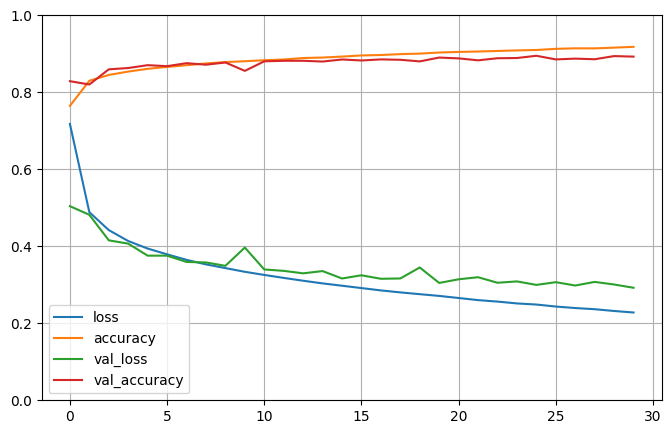

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()


- Có thể thấy độ chính xác của tập huấn luyện và kiểm tra tăng đều trong quá trình huấn luyện.
- Đường kiểm tra và huấn luyện khá gần nhau, điều đó có nghĩa là mô hình của ta không quá fit.

In [16]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 907us/step - loss: 58.9035 - accuracy: 0.8506


[58.903499603271484, 0.850600004196167]

**Sử dụng Model đưa ra dự đoán**

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba


1/1 [==============================] - 0s 65ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred


1/1 [==============================] - 0s 19ms/step


array([9, 2, 1], dtype=int64)

In [19]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [20]:
y_test[:3]


array([9, 2, 1], dtype=uint8)

Ta có thể lưu và khôi phục lại một model

In [21]:
model.save("my_keras_model.h5")  # save model


In [22]:
model = keras.models.load_model("my_keras_model.h5")  # restore model


# **4. Tinh chỉnh các hyperparameter của mạng neural**

-   Tính linh hoạt của mạng lưới neural là một trong những nhược điểm chính của chúng. Chúng có nhiều hyperparameter để tinh chỉnh chẳng hạn như số lớp và số neural, hàm kích hoạt và logic khởi tạo trọng số.
-   Một cách đơn giản đó là thử nhiều kết hợp các hyperparameter với nhau và xem kết hợp nào cho kết quả tốt nhất. Ta có thể sử dụng **GridSearchCV** hoặc **RandomizedSearchCV**
-   Ngoài ra, có rất nhiều kĩ thuật khác để khám phá không gian tìm kiếm hiệu quả hơn cách chọn ngẫu nhiên. Ý tưởng rất đơn giản: khi 1 khu vực của không gian tìm kiếm được phát hiện là tốt, nó nên được khám phá nhiều hơn.
    -   Hyperopt: một thư viện Python phổ biến để tối ưu hóa trên tất cả các loại không gian tìm kiếm phức tạp (bao gồm các giá trị thực như tỷ lệ học tập hoặc các giá trị rời rạc như số lớp).

    -   Hyperas, kopt hoặc Talos: tối ưu hóa siêu tham số cho mô hình Keras (hai thư viện đầu tiên dựa trên Hyperopt).

    -   Scikit-Optimize (skopt): một thư viện tối ưu hóa đa năng. Lớp Bayes SearchCV thực hiện tối ưu hóa Bayesian bằng cách sử dụng giao diện tương tự như Grid SearchCV.

    -   Spearmint: một thư viện tối ưu hóa Bayesian.

    -   Sklearn-Deap: một thư viện tối ưu hóa siêu tham số dựa trên các thuật toán tiến hóa, cũng với một giao diện tương tự như GridSearchCV.

    -   Và còn nhiều thư viện khác nữa!
- Số lượng hidden layers và số lượng neurons trong mỗi hidden layer là những tham số quan trọng cần được điều chỉnh để có được mô hình phù hợp. Với nhiều bài toán, một hidden layer đơn giản có thể đủ để đạt được kết quả tốt. Tuy nhiên, sử dụng nhiều hidden layers sẽ giúp mạng nơ-ron học được cấu trúc dữ liệu phức tạp hơn và đạt được hiệu suất tốt hơn với cùng lượng dữ liệu huấn luyện. Số lượng neurons trong mỗi hidden layer cũng cần được điều chỉnh, tuy nhiên, việc tăng số lượng hidden layers thường mang lại hiệu quả hơn. Các tham số khác như tốc độ học, kích thước batch cũng ảnh hưởng đáng kể đến hiệu suất của mô hình. Chọn một optimizer tốt và điều chỉnh các tham số của nó cũng rất quan trọng. Để tìm các tham số tối ưu, có thể sử dụng các kỹ thuật như early stopping. Có nhiều kiến trúc mạng nơ-ron khác nhau được sử dụng cho các bài toán khác nhau, bao gồm mạng nơ-ron tích chập và mạng nơ-ron tái tạo.